In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#sns.set(style="ticks")
from scipy import signal
from scipy.optimize import leastsq
from scipy.fft import rfft, rfftfreq
from scipy import signal

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import math
import csv
from datetime import datetime
from dateutil import parser
from datetime import datetime, timedelta

import os
import glob

Steps to set up CSV format 
- txt --> csv 
- Adjust format (split columns at spaces and tabs)
- new header row/ rename: date, time, red, ir, green, frequency 

In [5]:
#Max30101
path = '/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200'
csv_files = glob.glob(os.path.join(path, "*.csv"))
print(csv_files)

#'/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max215_200'
#'/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max118_200'
#'/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max69_200'

#'/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max215_400'
#'/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max118_400'
#'/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max69_400'

#Pulse Oximeter
path_po = '/Users/juliapersche/Desktop/Footbit_arm/Pulse Oximeter/PO411_200'
csv_files_po = glob.glob(os.path.join(path_po, "*.csv"))
print(csv_files_po)

#'/Users/juliapersche/Desktop/Footbit_arm/Pulse Oximeter/PO215_200'
#'/Users/juliapersche/Desktop/Footbit_arm/Pulse Oximeter/PO118_200'
#'/Users/juliapersche/Desktop/Footbit_arm/Pulse Oximeter/PO69_200'

#'/Users/juliapersche/Desktop/Footbit_arm/Pulse Oximeter/PO215_400'
#'/Users/juliapersche/Desktop/Footbit_arm/Pulse Oximeter/PO118_400'
#'/Users/juliapersche/Desktop/Footbit_arm/Pulse Oximeter/PO69_400'

#EKG files 
path_HR = '/Users/juliapersche/Desktop/Footbit_arm/Polar/HR411_200'
csv_files_HR = glob.glob(os.path.join(path_HR, "*.csv"))
print(csv_files_HR)

#'/Users/juliapersche/Desktop/Footbit_arm/Polar/HR215_200'
#'/Users/juliapersche/Desktop/Footbit_arm/Polar/HR118_200'
#'/Users/juliapersche/Desktop/Footbit_arm/Polar/HR69_200'

#'/Users/juliapersche/Desktop/Footbit_arm/Polar/HR215_400'
#'/Users/juliapersche/Desktop/Footbit_arm/Polar/HR118_400'
#'/Users/juliapersche/Desktop/Footbit_arm/Polar/HR69_400'




[]
[]
[]


In [50]:
#reorder Max30101 csvs in terms of brightness

indices = [5,3,1,7,4,0,8,2,6]
data = [csv_files[i] for i in indices]
print(data)

#reorder po csvs
indices_po = [0,6,5,1,4,7,3,2,8]
data_po = [csv_files_po[j] for j in indices_po]

# #reorder EKG csvs
indices_HR= [6,1,0,5,4,8,2,3,7]
data_HR = [csv_files_HR[b] for b in indices_HR]
print(data_HR)

['/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200/max1_411_200.csv', '/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200/max3_411_200.csv', '/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200/max5_411_200.csv', '/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200/max8_411_200.csv', '/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200/max16_411_200.csv', '/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200/max32_411_200.csv', '/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200/max64_411_200.csv', '/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200/max128_411_200.csv', '/Users/juliapersche/Desktop/Footbit_arm/Max30101_sensor/Max411_200/max255_411_200.csv']
['/Users/juliapersche/Desktop/Footbit_arm/Polar/HR411_200/hr1_411_200-1.csv', '/Users/juliapersche/Desktop/Footbit_arm/Polar/HR411_200/hr3_411_200.csv', '/Users/juliapersche/Desktop/Footbit_arm/Polar/HR411_200

In [40]:
#sensor files
#In Epoch, CST

list_of_dfs = []
Brightness = [1,3,5,8,16,32,64,128,255]
counter = 0

for f in data:
    k = pd.read_csv(f)
    k['Brightness'] = Brightness[counter]

    
    k = k.drop(range(0,5000))
    new_timestamps = []
    for idx, row in k.iterrows():
            newtime = (row['ts']).astype(str)
            newtime_2 = newtime[:-8]
            new_timestamps.append(newtime_2)
    
    k['Timestamp'] = new_timestamps
    k['Timestamp'] = k['Timestamp'].apply(int)
    
    list_of_dfs.append(k)
    counter += 1

df_max30101_411_200 = pd.concat(list_of_dfs)
df_max30101_411_200.head(30)

,ts,red,ir,green,Brightness,Timestamp
5000,1675896293712967,921.0,527.0,146.0,1,1675896293
5001,1675896293719967,921.0,527.0,146.0,1,1675896293
5002,1675896293726967,921.0,527.0,146.0,1,1675896293
5003,1675896293734967,912.0,500.0,90.0,1,1675896293
5004,1675896293741967,912.0,500.0,90.0,1,1675896293
5005,1675896293752967,913.0,525.0,134.0,1,1675896293
5006,1675896293759967,913.0,525.0,134.0,1,1675896293
5007,1675896293766967,913.0,525.0,134.0,1,1675896293
5008,1675896293774967,922.0,502.0,111.0,1,1675896293
5009,1675896293781967,922.0,502.0,111.0,1,1675896293


In [48]:
#pulse oximeter files 
#In CST. 
list_of_dfs_po = []
Brightness_po = [1,3,5,8,16,32,64,128,255]
counter_po = 0

for f_po in data_po:
    # read the csv file
    k_po = pd.read_csv(f_po)

    #sync up start time
    sensor_file = df_max30101_411_200.loc[df_max30101_411_200['Brightness'] == (Brightness_po[counter_po])]
    start_timestamp = sensor_file['Timestamp'].iloc[0]
    #print(start_timestamp)
    k_po['Brightness'] = Brightness_po[counter_po]
  

    #cut off if off from sensor
    k_po_filtered = k_po[k_po['Timestamp'] >= start_timestamp]
        
    list_of_dfs_po.append(k_po_filtered)
    counter_po += 1


df_po_69_200 = pd.concat(list_of_dfs_po)
df_po_69_200.drop('Date', axis=1, inplace=True)
df_po_69_200.drop('Time', axis=1, inplace=True)
df_po_69_200.drop('Session', axis=1, inplace=True)
df_po_69_200.drop('Index', axis=1, inplace=True)
df_po_69_200.head()


1675896293
1675896680
1675897431
1675897766
1675898305
1675899407
1675900448
1675900988
1676046296


,Timestamp,O2 Saturation,Pulse Rate,Breaths / min,Pleth Variability,Perfusion Index,Brightness
8,1675896293,100,54,--,--,1.2,1
9,1675896294,100,54,--,--,1.2,1
10,1675896295,100,53,--,--,1.2,1
11,1675896296,100,54,10,--,1.1,1
12,1675896297,100,53,10,--,1.1,1


In [57]:
#EKG files
#in GMT time.  Need to convert to epoch then -6 hours to put into CST
list_of_dfs_HR = []
Brightness_HR = [1,3,5,8,16,32,64,128,255]
counter_HR = 0

for f_HR in data_HR:
    # read the csv file
    k_HR = pd.read_csv(f_HR)

    #Covert to
    k_HR['Timestamp']  = (pd.to_datetime(k_HR['ts'])- pd.Timestamp('1970-01-01')).astype('timedelta64[s]').astype('int')
   
    #sync up start time
    sensor_file = df_max30101_411_200.loc[df_max30101_411_200['Brightness'] == (Brightness_HR[counter_HR])]
    start_timestamp = sensor_file['Timestamp'].iloc[0]
    k_HR['Brightness'] = Brightness_HR[counter_HR]
    
#cut off if off from sensor    
    k_HR_filtered = k_HR[k_HR['Timestamp'] >= start_timestamp]        
    list_of_dfs_HR.append(k_HR_filtered)
    counter_HR += 1


df_HR_411_200 = pd.concat(list_of_dfs_HR)

df_HR_411_200.head()

,ts,sensor_location,bpm,Timestamp,Brightness
52,2023-02-08 22:44:53.165467,chest,55,1675896293,1
53,2023-02-08 22:44:54.156662,chest,55,1675896294,1
54,2023-02-08 22:44:55.145662,chest,54,1675896295,1
55,2023-02-08 22:44:56.135602,chest,54,1675896296,1
56,2023-02-08 22:44:57.125778,chest,54,1675896297,1


In [62]:
#Checking Timestamps
#Difference between timestamp 1 (brightness 1) of max30101 and PO
1675896293 - 1675896293 

#Difference between timestamp 1 (brightness 1) of Polar and PO
1675896293 -1675896293

0

/var/folders/xv/_kt5cgd12jl2mt2z16gq8ryw0000gn/T/ipykernel_1440/2845311291.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.lineplot(data=df_max30101_411_200.loc[df_max30101_411_200['Brightness'] == 1]['red'][0:400])


<AxesSubplot: ylabel='red'>

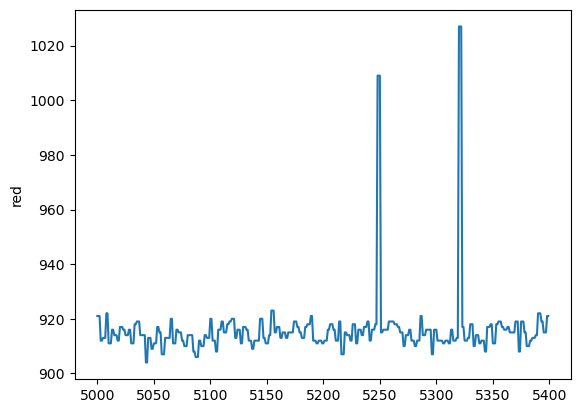

In [61]:
sns.lineplot(data=df_max30101_411_200.loc[df_max30101_411_200['Brightness'] == 1]['red'][0:400])

In [ ]:
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 1]['Red'][0:200],label = "1")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 2]['Red'][0:200],label = "2")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 3]['Red'][0:200],label = "3")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 4]['Red'][0:200],label = "4")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 5]['Red'][0:200],label = "5")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 8]['Red'][0:200],label = "8")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 16]['Red'][0:200],label = "16")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 32]['Red'][0:200],label = "32")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 64]['Red'][0:200],label = "64")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 128]['Red'][0:200],label = "128")
plt.plot(x,df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 255]['Red'][0:200],label = "255")
plt.legend()
plt.title('Comparing Brightness vs Pulse width and Sampling Frequency')
plt.show()

In [35]:
#looking at Sensor signals

RED1= df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 1]['Red']
IR1= df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 1]['IR']
GREEN1= df_max30101_69_200.loc[df_max30101_69_200['Brightness'] == 1]['Green']

x = df_max30101_69_200['Timestamp'].index

RED1_norm = (RED1 - RED1.mean())/ (RED1.max()-RED1.min())
IR1_norm = (IR1- IR1.mean())/ (IR1.max()-IR1.min())
GREEN1_norm = (GREEN1 - GREEN1.mean())/ (GREEN1.max()-GREEN1.min())



In [36]:
#Filtering Signal
RED_signal= signal.butter(2, [.5,8], btype="bandpass", fs=fs, output="sos")
RED_filt = signal.sosfilt(RED_signal, RED1_norm)

#Filtering Noise
#should we do a band stop? so capturing high and low noise? 
noise = signal.butter(2, [.5,8], btype="bandstop", fs=fs, output="sos")
RED_noise = signal.sosfilt(noise, RED1)